In [1]:
import torch
import torch.nn as nn

In [2]:
# x = torch.arange(4*2).add(1).reshape(4, 2)
x = [[1,2], [3,4], [5,6], [7,8]]
y = [[3], [7], [11], [15]]

In [3]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)
print(device)

cuda


In [5]:
nn.Linear(2,7)

nn.ReLU

torch.nn.modules.activation.ReLU

In [6]:
class MyNeuralNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        # inputs = 2
        # hidden_layer = 1
        # hidden_layer_nodes = 8
        # outputs = 1
        self.input_to_hidden_layer = nn.Linear(2,8)
        self.hidden_layer_activation = nn.ReLU()
        self.hidden_to_output_layer = nn.Linear(8,1)

    def forward(self,x):
        x = self.input_to_hidden_layer(x)
        x = self.hidden_layer_activation(x)
        x = self.hidden_to_output_layer(x)
        return x  # predicted output

In [7]:
mynet = MyNeuralNet().to(device)

In [8]:
mynet.input_to_hidden_layer.weight

Parameter containing:
tensor([[-0.0519, -0.5972],
        [ 0.0222,  0.3200],
        [ 0.3529,  0.5304],
        [ 0.5680, -0.0089],
        [-0.5819,  0.5466],
        [-0.0227, -0.5117],
        [-0.6658,  0.5419],
        [ 0.0800,  0.3470]], device='cuda:0', requires_grad=True)

In [9]:
for i in mynet.parameters():
    print(i)

Parameter containing:
tensor([[-0.0519, -0.5972],
        [ 0.0222,  0.3200],
        [ 0.3529,  0.5304],
        [ 0.5680, -0.0089],
        [-0.5819,  0.5466],
        [-0.0227, -0.5117],
        [-0.6658,  0.5419],
        [ 0.0800,  0.3470]], device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.5529, -0.6281, -0.5622,  0.0550, -0.0680, -0.3353, -0.0035, -0.3261],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([[ 0.2039, -0.0607, -0.2813, -0.2104,  0.1870,  0.3145, -0.1429, -0.1036]],
       device='cuda:0', requires_grad=True)
Parameter containing:
tensor([-0.0666], device='cuda:0', requires_grad=True)


In [10]:
loss_func = nn.MSELoss()

In [11]:
_Y = mynet(X)   # is same as _Y = mynet.forward(X)
loss_value = loss_func(_Y, Y)
print(loss_value)

tensor(144.6666, device='cuda:0', grad_fn=<MseLossBackward0>)


In [12]:
from torch.optim import SGD

opt = SGD(mynet.parameters(), lr=0.001)
opt

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [13]:
print(opt.param_groups)
opt.zero_grad()
print(opt.param_groups)

[{'params': [Parameter containing:
tensor([[-0.0519, -0.5972],
        [ 0.0222,  0.3200],
        [ 0.3529,  0.5304],
        [ 0.5680, -0.0089],
        [-0.5819,  0.5466],
        [-0.0227, -0.5117],
        [-0.6658,  0.5419],
        [ 0.0800,  0.3470]], device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.5529, -0.6281, -0.5622,  0.0550, -0.0680, -0.3353, -0.0035, -0.3261],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([[ 0.2039, -0.0607, -0.2813, -0.2104,  0.1870,  0.3145, -0.1429, -0.1036]],
       device='cuda:0', requires_grad=True), Parameter containing:
tensor([-0.0666], device='cuda:0', requires_grad=True)], 'lr': 0.001, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False}]
[{'params': [Parameter containing:
tensor([[-0.0519, -0.5972],
        [ 0.0222,  0.3200],
        [ 0.3529,  0.5304],
        [ 0.5680, -0.0089],
        [-0.5819,  0.5466],
      

In [14]:
loss_history = list()
epochs = 50
for _ in range(epochs):
    opt.zero_grad()
    loss_value = loss_func(mynet(X), Y)
    loss_value.backward()
    opt.step()
    # print(opt.param_groups)
    loss_history.append(loss_value.item())

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

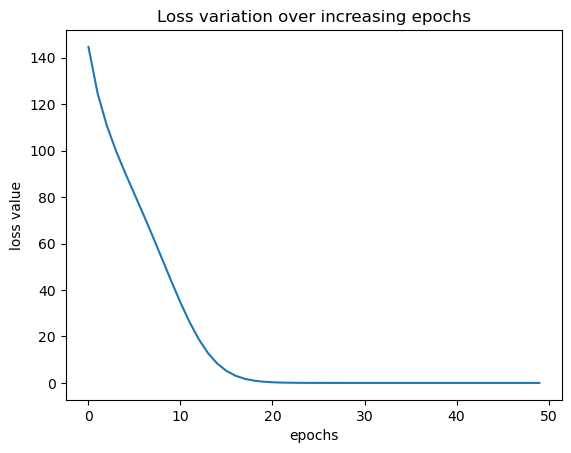

In [16]:
plt.plot(loss_history)
plt.title("Loss variation over increasing epochs")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

In [17]:
loss_history

[144.66659545898438,
 124.6358871459961,
 110.75473022460938,
 99.85660552978516,
 90.33917999267578,
 81.30619049072266,
 72.25591278076172,
 62.961360931396484,
 53.425132751464844,
 43.85131072998047,
 34.59922790527344,
 26.10169219970703,
 18.75441551208496,
 12.810566902160645,
 8.323149681091309,
 5.158632278442383,
 3.064487934112549,
 1.7553045749664307,
 0.9757462739944458,
 0.5297752022743225,
 0.2826448380947113,
 0.14903712272644043,
 0.07813994586467743,
 0.041039127856492996,
 0.02182040736079216,
 0.011937633156776428,
 0.006881827022880316,
 0.004304400645196438,
 0.002992874477058649,
 0.0023257031571120024,
 0.0019857087172567844,
 0.0018114596605300903,
 0.0017211277736350894,
 0.0016731926007196307,
 0.0016466925153508782,
 0.001631047111004591,
 0.0016209010500460863,
 0.0016134983161464334,
 0.0016075028106570244,
 0.0016022506169974804,
 0.001597337774001062,
 0.0015926331980153918,
 0.0015880133723840117,
 0.0015834785299375653,
 0.0015789421740919352,
 0.00157

In [18]:
opt.param_groups

[{'params': [Parameter containing:
   tensor([[-0.0519, -0.5972],
           [ 0.1219,  0.4397],
           [ 0.5101,  0.7194],
           [ 0.6231,  0.0575],
           [-0.2312,  0.9668],
           [-0.0227, -0.5117],
           [-0.6849,  0.5146],
           [ 0.2145,  0.5084]], device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([-0.5529, -0.6082, -0.5304,  0.0663,  0.0015, -0.3353, -0.0117, -0.2991],
          device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([[ 0.2039,  0.2995,  0.6782,  0.3616,  0.6122,  0.3145, -0.1321,  0.4287]],
          device='cuda:0', requires_grad=True),
   Parameter containing:
   tensor([0.1555], device='cuda:0', requires_grad=True)],
  'lr': 0.001,
  'momentum': 0,
  'dampening': 0,
  'weight_decay': 0,
  'nesterov': False,
  'maximize': False,
  'foreach': None,
  'differentiable': False}]